In [3]:
from scipy import stats
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
import pandas as pd
from theano import shared
from sklearn import preprocessing

In [2]:
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.8


In [6]:
data = pd.read_csv('renfe_small.txt')
# data.drop('Unnamed: 0', axis = 1, inplace=True)
data = data.sample(frac=0.01, random_state=99)
data.head(3)

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
4738,2019-04-17 08:03:35,VALENCIA,MADRID,2019-05-21 08:00:00,2019-05-21 09:47:00,AVE,33.65,Turista,Promo
8722,2019-05-09 07:12:41,MADRID,BARCELONA,2019-05-25 08:30:00,2019-05-25 11:15:00,AVE,85.10,Turista,Promo
13185,2019-04-24 11:21:26,MADRID,VALENCIA,2019-05-22 17:40:00,2019-05-22 19:20:00,AVE,51.15,Turista,Promo


In [8]:
data.isnull().sum()/len(data)
data.size

2322

In [9]:
data['train_class'] = data['train_class'].fillna(data['train_class'].mode().iloc[0])
data['fare'] = data['fare'].fillna(data['fare'].mode().iloc[0])
data['price'] = data.groupby('fare').transform(lambda x: x.fillna(x.mean()))

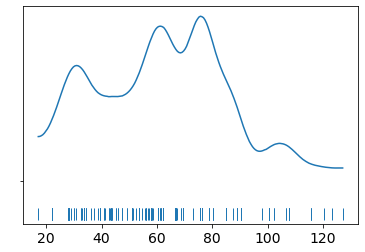

In [10]:
az.plot_kde(data['price'].values, rug=True)
plt.yticks([0], alpha=0);

In [13]:
with pm.Model():
    noise_1 = pm.Normal("noise_1", mu = 0, sigma = 3)

In [14]:
noise_1

noise_1

In [4]:
data1 = pd.read_csv("data.txt", header = None, sep = " ")

In [5]:
data1.iloc[:, 0].to_numpy()

array([4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5,
       5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. ,
       4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. ,
       5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6,
       4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5,
       5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. ,
       4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. ,
       5.6, 4.5, 5. , 4. , 5.6, 4.5, 5. , 4. , 5.6])

In [52]:
with pm.Model() as amplifier_model:
    roh = pm.Uniform("roh", 0.3, 0.98)
    I_set = data1.iloc[:, 0].to_numpy()
    I_pre = roh * I_set + pm.Normal("noise_1", mu = 0, sigma = 1)
    f_I_pre = 5 + 10 / (1 + np.exp(- I_pre + 4))
    I = f_I_pre + pm.Normal('noise_3', sigma = 3)
    # P = pm.Deterministic("P", 4 * I * I, observed = data1.iloc[:, 1].to_numpy())

TypeError: Deterministic() got an unexpected keyword argument 'observed'

In [48]:
with amplifier_model:
    

AttributeError: 'TensorVariable' object has no attribute 'random'

In [10]:
from numpy import random

I_set = data1.iloc[:, 0].to_numpy()

def generate_simulations(roh):
    I_pre = roh * I_set + random.normal(loc = 0, scale = 1, size = (len(I_set), ))
    f_I_pre = 5 + 10 / (1 + np.exp(- I_pre + 4))
    I = f_I_pre + random.normal(loc = 0, scale = 3, size = (len(I_set), ))
    return I

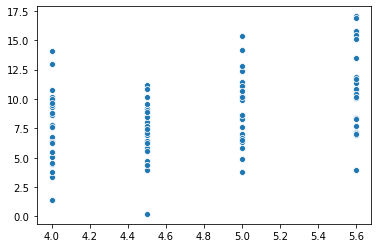

In [8]:
results = np.sqrt(data1.iloc[:, 1].to_numpy())/2
sns.scatterplot(I_set, results)

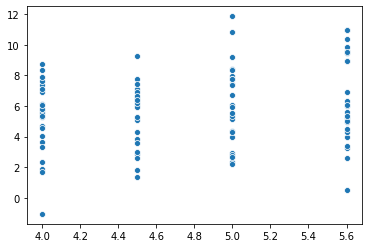

In [70]:
try1 = generate_simulations(0.32)
sns.scatterplot(I_set, try1)

In [64]:
from scipy.stats import shapiro, normaltest
for i in [4, 4.5, 5, 5.6]:
    data = np.sqrt(data1.loc[data1.iloc[:, 0] == i, 1])/2
    stat, p = shapiro(data)
    stat2, p2 = normaltest(data)
    print(i, ": ", len(data), p, "; ", p2)

4 :  25 0.9860762357711792 ;  0.9532525213336253
4.5 :  25 0.4982636570930481 ;  0.1357141801904275
5 :  25 0.9839938282966614 ;  0.9000744712452805
5.6 :  25 0.21110974252223969 ;  0.5429148403199461


In [65]:
for i in [4, 4.5, 5, 5.6]:
    data = np.sqrt(data1.loc[data1.iloc[:, 0] == i, 1])/2
    print(i, ": ", data.mean(), "; ", data.std())

4 :  7.590923882986635 ;  2.9909218487635663
4.5 :  7.082264308068796 ;  2.452233547332045
5 :  9.223684364999393 ;  2.8493757102816555
5.6 :  10.872887964124686 ;  3.578742861274675


In [66]:
data_temp = (np.sqrt(data1.loc[data1.iloc[:, 0] == 4.5, 1])/2).to_numpy()
data_temp.sort()
# data_temp = data_temp[1:-1]
print(i, ": ", data_temp.mean(), "; ", data_temp.std())

stat, p = shapiro(data_temp)
stat2, p2 = normaltest(data_temp)
print(i, ": ", len(data_temp), p, "; ", p2)

5.6 :  7.082264308068796 ;  2.4026883684394607
5.6 :  25 0.4982636570930481 ;  0.13571418019042725


In [40]:
np.sqrt(data1.loc[data1.iloc[:, 0] == 4.5, 1])/2).to_numpy()

In [67]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data_temp.reshape(-1, 1))
print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(data_temp.reshape(-1, 1))

best bandwidth: 2.9763514416313175


In [68]:
kde = grid.best_estimator_

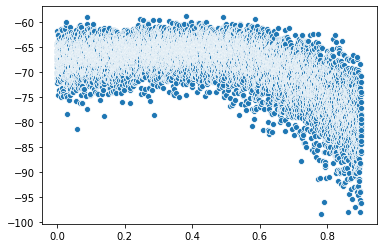

In [80]:
lista = []
for roh in np.linspace(0.0, 1.0, num = 10000):
    try1 = generate_simulations(roh)
    log_den = kde.score_samples(try1[data1.iloc[:, 0] == 4.5].reshape(-1, 1)).sum()
    lista.append(log_den) 
    # print("{0}: {1} \n".format(roh, log_den))
sns.scatterplot(np.linspace(0.0, 0.9, num = 10000), lista)

In [62]:
kde.score_samples(data1.loc[data1.iloc[:, 0] == 4.5, 1].to_numpy().reshape(-1, 1)).sum()

-140659.3745631204